<a href="https://colab.research.google.com/github/Hafsa-Ugase/Hate-Speech-detection-/blob/main/Davidson_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      
---

---
         
 # <font color='#2F4F4F'>**Hate Speech Detection on Twitter.** </font>



---






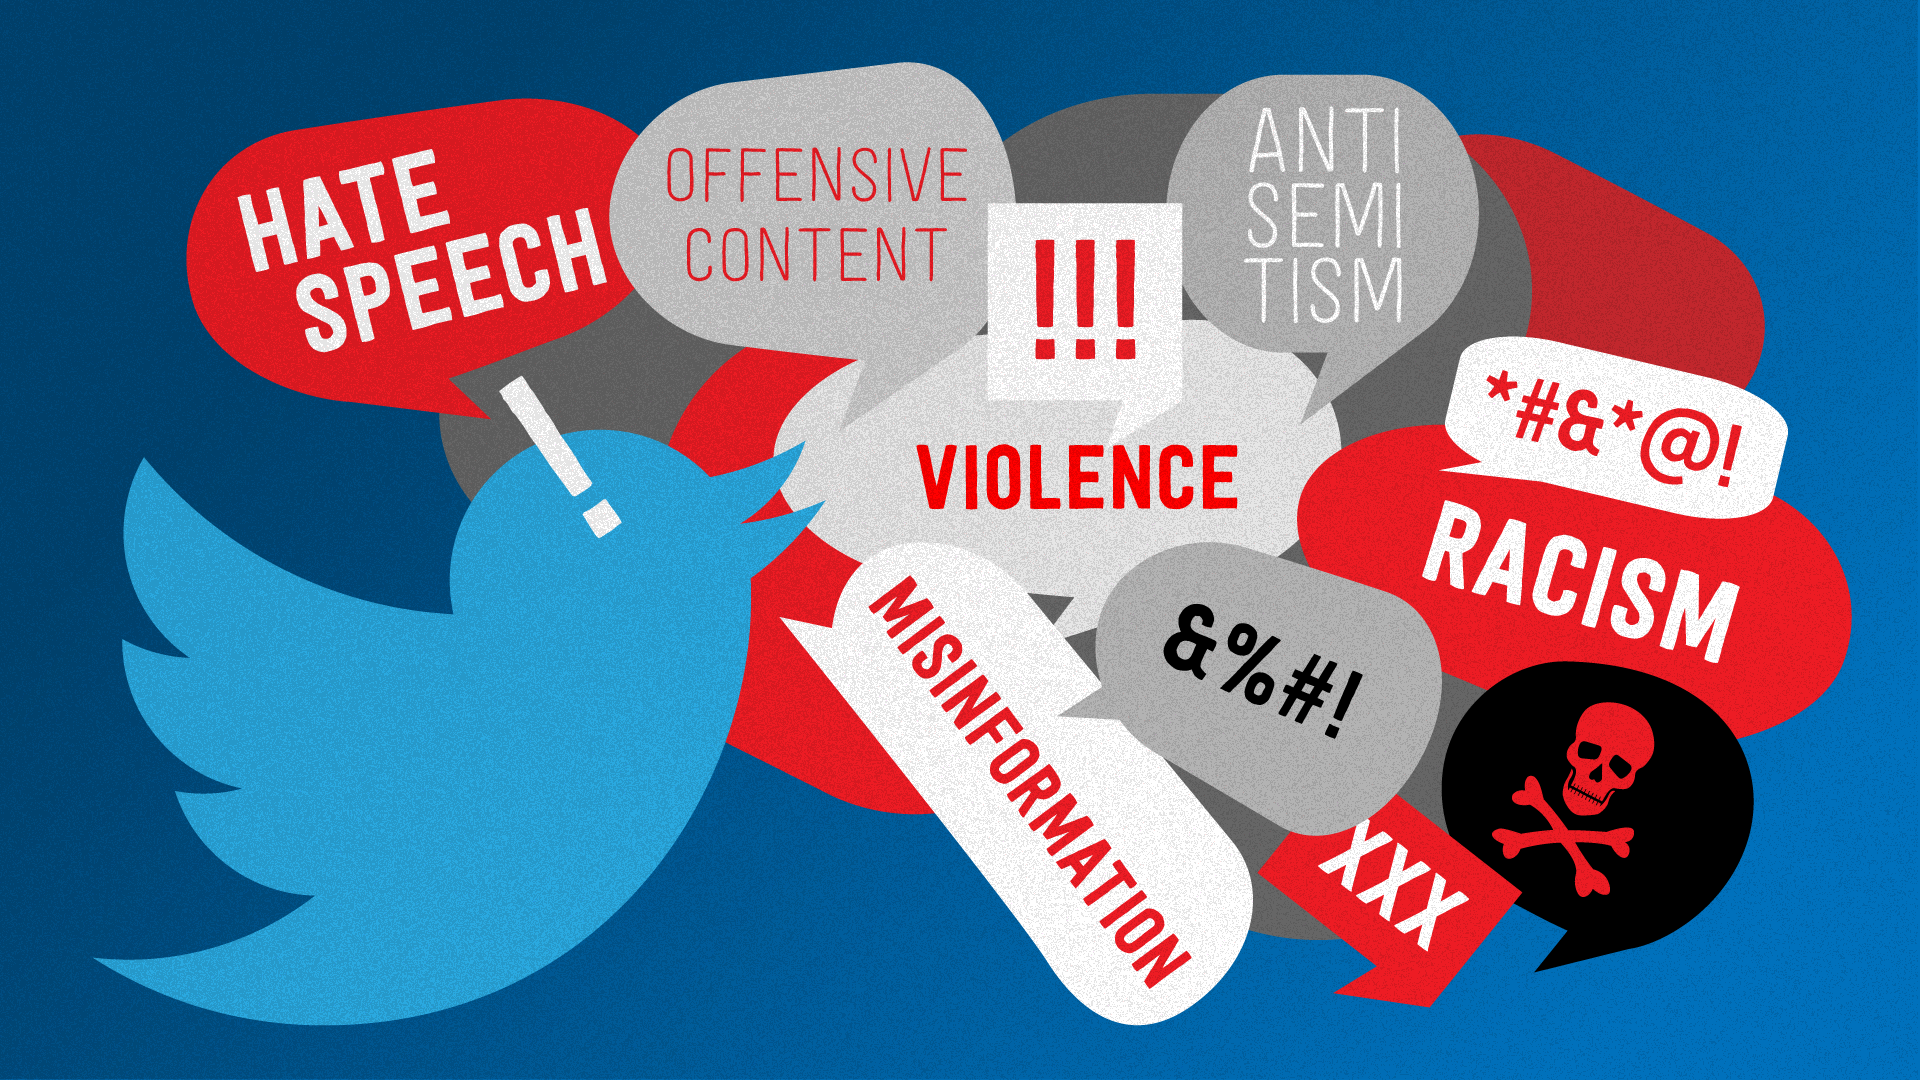






---


# <font color='#2F4F4F'>Summary of this page study</font>                 


→ Hate speech has become one of the main problems that exists on Twitter's plattform. In this project using supervised machine learning along with classification models, I will be using these models to detect hate content on Twitter's dataset.

- Overview

Logestic regression is the final algothim model, as it perfomed well in both diffrent feature extraction TFI-DF and counter vectrozier. Davidosn dataset with HASOC2019 were imbalanced. I applied technquies to balance the data,the best one was Tomek links also. It seems the model perfomed better in a large dataset.
---

---













---


# <font color='#2F4F4F'>Dataset Source </font>  

---



The dataset will be used in this projet: 

Davidson Dataset contains 24783 texts of tweets. Davidson's datasets contains 7 column, the targeted column is 'Class'. The dataset is already labelled and voted by crowdsource, class catograizes as follows: 0 for hate speech, 1 : offensive language, 2 : neither ,   The raw dataset can be found here:
→  https://github.com/t-davidson/hate-speech-and-offensive-language/blob/master/data/labeled_data.csv 




---


# <font color='#2F4F4F'>What is the most common words for all three labels ? </font>  

---



**Davidosn dataset**

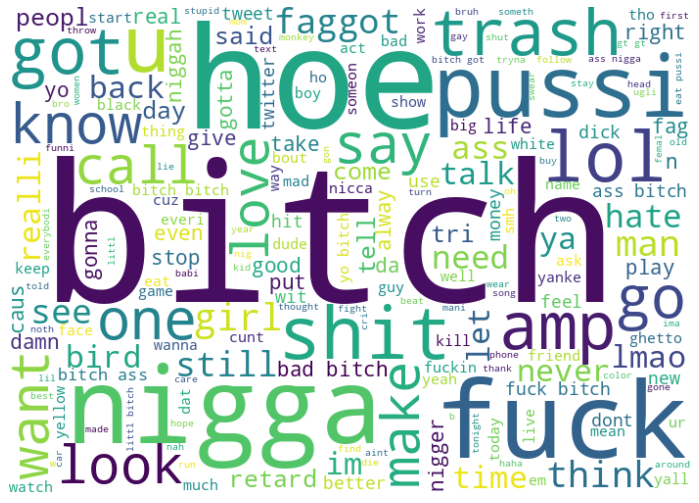

---


# <font color='#2F4F4F'>What is the most common hate words in Davidosn dataset  ? </font>  

---


**Davidson** **dataset**

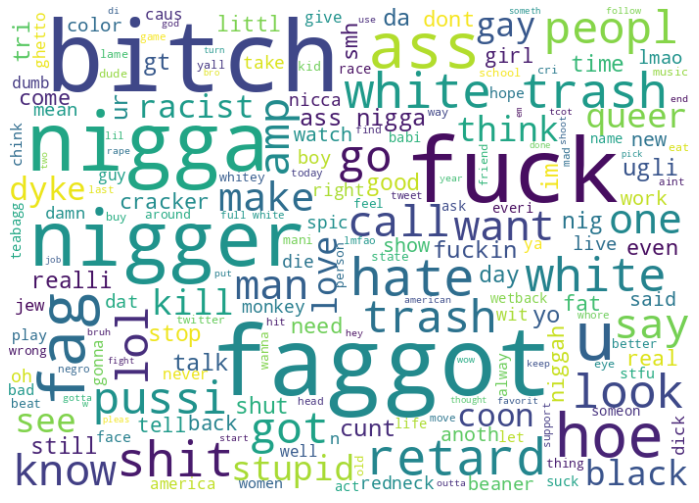

---


# <font color='#2F4F4F'>Data Imbalanced </font>  

---

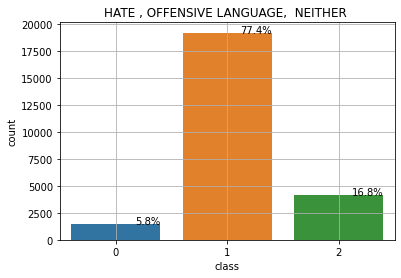

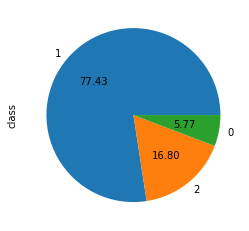



---



# <font color='IndianRed'>**Importing Libraries** </font>


---

In [1]:
!pip install tweet-preprocessor

# importing libraries
import pandas as pd # imports the dataset csv.
import numpy as np

#from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import nltk
import string
import re 
import preprocessor as pr
import seaborn as sns


nltk.download('stopwords')
from nltk.corpus import stopwords
# one way to show the data in a string values
#",".join(stopwords.words('english'))
# another way to print out the data values
stop_wordsall= (stopwords.words('english'))
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
ps = nltk.PorterStemmer()

# importing models

from sklearn.model_selection import train_test_split,cross_validate , GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors  import KNeighborsClassifier

# importing 
from sklearn.metrics import accuracy_score,f1_score

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer ,TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics 

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


---
# <font color='IndianRed'>**Data Loading** </font>


---

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/t-davidson/hate-speech-and-offensive-language/master/data/labeled_data.csv")

---
# <font color='IndianRed'>**Checking for missing values** </font>


---

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


<Axes: >

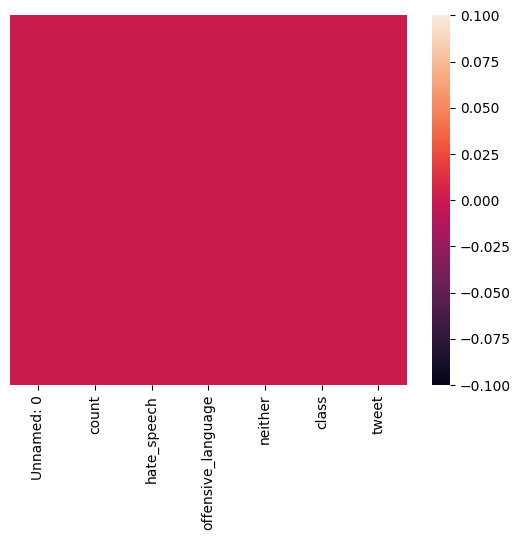

In [4]:
sns.heatmap(df.isnull(), yticklabels = False)

#means the there are no missing values. 

<Axes: >

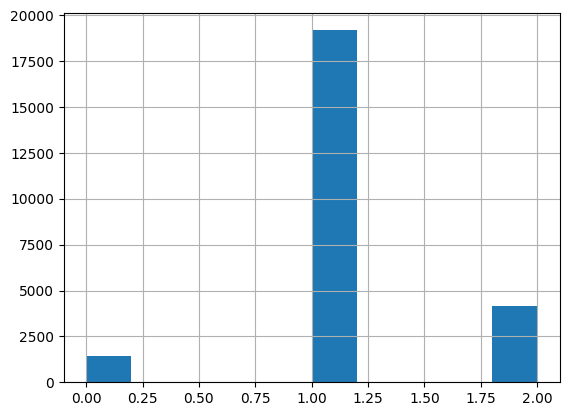

In [5]:
df['class'].hist()

---
# <font color='IndianRed'>**Data preprocessing** </font>


---

In [6]:
from typing_extensions import Text
def remove_pattern(text,pattern):
    
#re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)

#remove https links 
    text = re.sub(r"http\S+", "", text) 

#remove website links
    text = re.sub(r"www.\S+", "", text) 

#Lowercase
    text = text.lower() 

#re.sub() removes @user from the sentences in the dataset
    for i in r:
       text=  re.sub("@[A-Za-z0-9_]+","", text)
    return text

#remove above mentioned
df['Clean_Tweets'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

#remove punction
df['Clean_Tweets'] = df['Clean_Tweets'].str.replace("[^a-zA-Z]", " ") 
df['Clean_Tweets'] = df['Clean_Tweets'].apply(lambda x: re.sub(r'\brt\b', '',x).strip())

#tokenzie 
tokenized_tweet = df['Clean_Tweets'].apply(lambda x: x.split())

#stop word 
tokenized_tweet=  tokenized_tweet.apply(lambda x: [word for word in x if word not in stop_wordsall]) 

#stem
tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x]) 

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
df['Clean_Tweets'] = tokenized_tweet 


<ipython-input-6-3f08a06be2db>:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Clean_Tweets'] = df['Clean_Tweets'].str.replace("[^a-zA-Z]", " ")


In [7]:
df.head(10)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,Clean_Tweets
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,woman complain clean hous amp man alway take t...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dat cold tyga dwn bad cuffin dat hoe st place
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg ever fuck bitch start cri confus shit
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,look like tranni
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shit hear might true might faker bitch told ya
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",shit blow claim faith somebodi still fuck hoe
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ...",sit hate anoth bitch got much shit go
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,caus tire big bitch come us skinni girl
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ...",amp might get ya bitch back amp that
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria...",hobbi includ fight mariam bitch


---
# <font color='IndianRed'>**What the most common words in Davidson dataset?** </font>


---

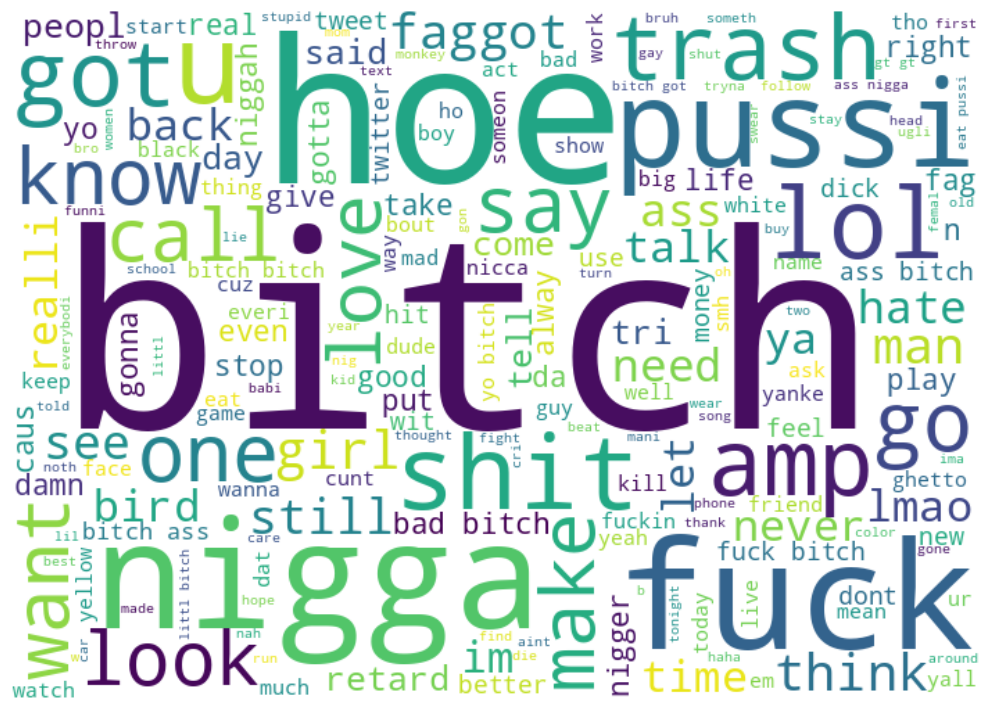

In [8]:
#import worldcloud

from wordcloud import WordCloud
commonwords = ' '.join([text for text in df['Clean_Tweets']])

wordcloud = WordCloud(height = 500, width = 700, background_color = 'white', random_state= 25,).generate(commonwords)
plt.figure(figsize=(15, 9))

#shows the dataset in a displayed image
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()

---
# <font color='IndianRed'>**What the most common hate words in Davidson dataset?** </font>


---

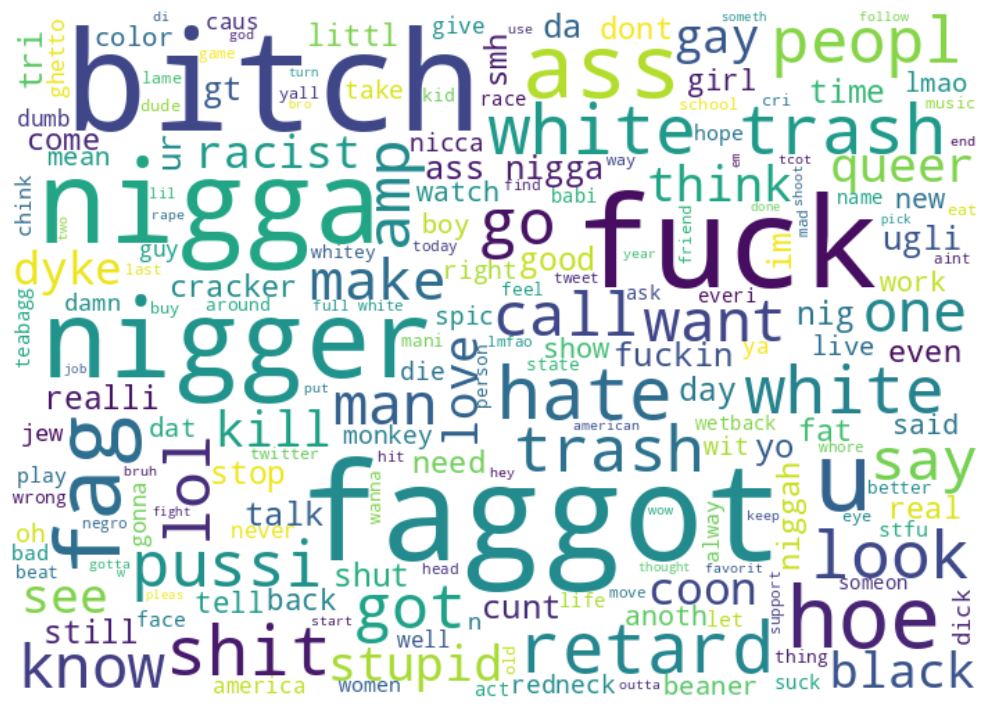

In [9]:
hatewords = ' '.join([text for text in df['Clean_Tweets'][df["class"] == 0]])

wordcloud = WordCloud(height = 500, width = 700, background_color = 'white', random_state= 25,max_font_size=100).generate(hatewords)
plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()

---
# <font color='IndianRed'>**Data visualization** </font>


---

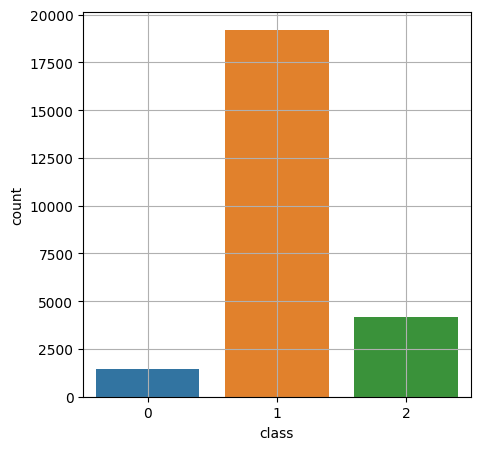

In [10]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='class', data = df)
plt.grid()



<Axes: >

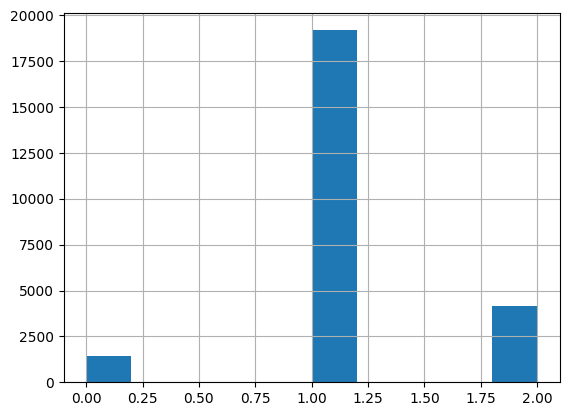

In [11]:
df['class'].hist()

---
# <font color='IndianRed'>**Counts of label 'Class'** </font>


---

**1:offensive language**,
**2.Neither**,
**3. Hate speech**

In [12]:
df['class'].value_counts()


1    19190
2     4163
0     1430
Name: class, dtype: int64

---
# <font color='IndianRed'>**Lengh of Davidson dataset** </font>


---

In [13]:
len (df)

24783

---


# <font color='#8B008B'>**Further experiment using TFIDF** </font>

---

In [14]:
#TFIDF 
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)

# TF-IDF feature matrix 
# confront text to numeric 
tfidf = tfidf_vectorizer.fit_transform(df['Clean_Tweets'] )



---


# <font color='8B008B'>**Random forest** </font>


---







In [15]:
X = tfidf
y = df['class'].astype(int)

In [16]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [17]:
#RandomForest
rf=RandomForestClassifier(class_weight='balanced', n_jobs=1, random_state=42)

#fitting the model 
rf.fit(X_train_tfidf,y_train)

# Predict class labels
y_pred_rf = rf.predict(X_test_tfidf)

# Evaluation of the model 
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.47      0.27      0.34       290
           1       0.94      0.94      0.94      3832
           2       0.82      0.91      0.86       835

    accuracy                           0.90      4957
   macro avg       0.74      0.71      0.72      4957
weighted avg       0.89      0.90      0.89      4957



In [18]:
# Training Accuracy 
print('Training Accuracy is  : ',
      metrics.accuracy_score(y_train,
                             rf.predict(X_train_tfidf ))*100)

Training Accuracy is  :  99.56622616765863




---


# <font color='8B008B'>**Ada boost** </font>

---







In [19]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [20]:
dt = DecisionTreeClassifier(max_depth=1)

# Adaabost
ada = AdaBoostClassifier(random_state=42)
# Fit the model
ada.fit(X_train_tfidf,y_train)

# Predict class labels
y_pred_ada = ada.predict(X_test_tfidf)

# Evaluation of the model
print(classification_report(y_test, y_pred_ada))


              precision    recall  f1-score   support

           0       0.50      0.17      0.26       290
           1       0.94      0.95      0.95      3832
           2       0.81      0.93      0.87       835

    accuracy                           0.90      4957
   macro avg       0.75      0.69      0.69      4957
weighted avg       0.89      0.90      0.89      4957



In [21]:
# Training Accuracy 
print('Training Accuracy is : ',
      metrics.accuracy_score(y_train,
                             ada.predict(X_train_tfidf ))*100)

Training Accuracy is :  90.65873095934631


---
# <font color='8B008B'>**Logistic Regression** </font>

---

In [22]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

In [23]:
# Logestic regression 
lg = LogisticRegression(max_iter=100,class_weight='balanced', penalty='l2', solver='saga')

# fitting the model 
lg.fit(X_train_tfidf,y_train)

# Predict class labels
y_pred_lg = lg.predict(X_test_tfidf)

# Evaluation of the model 
print(classification_report(y_test, y_pred_lg))


              precision    recall  f1-score   support

           0       0.31      0.49      0.38       290
           1       0.97      0.84      0.90      3832
           2       0.68      0.95      0.79       835

    accuracy                           0.84      4957
   macro avg       0.65      0.76      0.69      4957
weighted avg       0.88      0.84      0.85      4957



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [24]:
# Training Accuracy 
print('Training Accuracy is : ',
      metrics.accuracy_score(y_train, lg.predict(X_train_tfidf ))*100)

Training Accuracy is :  87.08766266518712


---
# <font color='8B008B'>**KNN** </font>

---

In [25]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [26]:
# KNN
kn = KNeighborsClassifier()

# fit the model
kn.fit(X_train_tfidf,y_train)

# Predict class labels
y_pred_kn = kn.predict(X_test_tfidf)

#Evaluation of the mode
print(classification_report(y_test, y_pred_kn))

              precision    recall  f1-score   support

           0       0.46      0.14      0.22       290
           1       0.93      0.30      0.46      3832
           2       0.22      0.94      0.35       835

    accuracy                           0.40      4957
   macro avg       0.54      0.46      0.34      4957
weighted avg       0.78      0.40      0.43      4957



In [27]:
print('Training Accuracy is : ',
      metrics.accuracy_score(y_train,
                             kn.predict(X_train_tfidf ))*100)

Training Accuracy is :  49.34933925148795


---


# <font color='#FF4500'>**Conclusion** </font>

---

In [28]:
import io 
from google.colab import files
uploaded = files.upload()

Saving TFIDF-Davidson.xlsx to TFIDF-Davidson (3).xlsx


**Scores in hate speech in specific class 0**

In [29]:
df= pd.read_excel(io.BytesIO(uploaded['TFIDF-Davidson.xlsx']))
df

,Model name,Precision,recall,f1-score,class
0,Random Forest - TFIDF,0.47,0.27,0.34,0
1,Ada Boost- TFIDF,0.50,0.17,0.26,0
2,Logestic Regression- TFIDF,0.44,0.20,0.27,0
3,KNN - TFIDF,0.46,0.14,0.22,0


---
# <font color='8B008B'>**Tomek links /Logestic regression using TFIDF vectorizer** </font>

---

In [30]:
#import Tomek links 
from imblearn.under_sampling import TomekLinks
tom = TomekLinks()

In [31]:
#Appply Tomek links on the trainning data
tomek_X_train, tomek_y_train = tom.fit_resample(X_train_tfidf, y_train)

In [32]:
#Logestic regresssoin
tomek_log_tf = RandomForestClassifier(class_weight='balanced', n_jobs=1, random_state=42)

In [33]:
#Fit the model
tomek_log_tf.fit(tomek_X_train, tomek_y_train)

#Predict class labels
tomek_log_preds_tf = tomek_log_tf.predict(X_test_tfidf)

#Evaluation of the model
print(classification_report(y_test, tomek_log_preds_tf))

              precision    recall  f1-score   support

           0       0.47      0.27      0.34       290
           1       0.94      0.95      0.94      3832
           2       0.82      0.91      0.87       835

    accuracy                           0.90      4957
   macro avg       0.74      0.71      0.72      4957
weighted avg       0.89      0.90      0.89      4957





---


# <font color='#2E86C1'>**Counter Vectorization** </font>


---



---
# <font color='#2E86C1'>**Data preprocessing** </font>


---

**I had to repeat the process of the data as the first one was for the feature extraction TFIDF.**

In [34]:
df = pd.read_csv("https://raw.githubusercontent.com/t-davidson/hate-speech-and-offensive-language/master/data/labeled_data.csv")

In [35]:
from typing_extensions import Text
def remove_pattern(text,pattern):
    
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)


    text = re.sub(r"http\S+", "", text) # remove https links 
    text = re.sub(r"www.\S+", "", text) # remove website links

    text = text.lower() 

     #re.sub() removes @user from the sentences in the dataset
    for i in r:
       text=  re.sub("@[A-Za-z0-9_]+","", text)
    
    return text

df['Clean_Tweets'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*") # remove above mentioned
df['Clean_Tweets'] = df['Clean_Tweets'].str.replace("[^a-zA-Z]", " ") # remove punction

df['Clean_Tweets'] = df['Clean_Tweets'].apply(lambda x: re.sub(r'\brt\b', '',x).strip())

#  tokenzie 
tokenized_tweet = df['Clean_Tweets'].apply(lambda x: x.split())

tokenized_tweet=  tokenized_tweet.apply(lambda x: [word for word in x if word not in stop_wordsall]) # stop word 

tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x]) # stem


for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

df['Clean_Tweets'] = tokenized_tweet 


<ipython-input-35-061fbe6f2468>:20: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Clean_Tweets'] = df['Clean_Tweets'].str.replace("[^a-zA-Z]", " ") # remove punction


In [36]:
df_x =df ['Clean_Tweets']
df_y =df['class'].astype(int)

---


# <font color='#8B008B'>**Data imbalanced** </font>

---

<Axes: ylabel='class'>

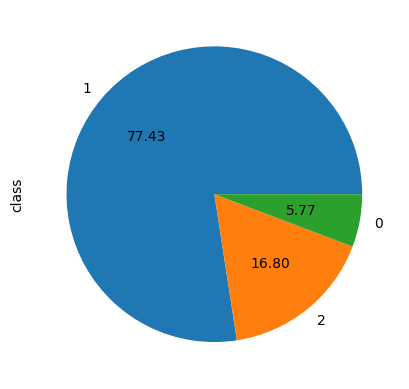

In [37]:
#Data distribution in the data
df_y.value_counts().plot.pie(autopct='%.2f')

---


# <font color='#2E86C1'>**Counter Vectorization/Logestic Regression** </font>

---

In [38]:
#Count vectorizer with stop words
count_vectorizer = CountVectorizer()
count = CountVectorizer(stop_words=stop_wordsall)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df_x,df_y, random_state=42, test_size=0.2)

#Fit the count words to trainning 
X_train_count = count.fit_transform(X_train)

#Fit the count words to testing
X_test_count = count.transform(X_test)

In [40]:
#Count vec on LR
count_log_reg= LogisticRegression(max_iter=100,class_weight='balanced', penalty='l2', solver='saga')

#Fit the model 
count_log_reg.fit(X_train_count, y_train)

#Predict class labels
pred_lg = count_log_reg.predict(X_test_count)

#Evaluation of the model
print(classification_report(y_test, pred_lg))

              precision    recall  f1-score   support

           0       0.31      0.57      0.40       290
           1       0.96      0.87      0.91      3832
           2       0.80      0.91      0.85       835

    accuracy                           0.86      4957
   macro avg       0.69      0.78      0.72      4957
weighted avg       0.90      0.86      0.87      4957



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [41]:
#Training Accuracy
print('Training Accuracy is  : ',
      metrics.accuracy_score(y_train,
                             count_log_reg.predict(X_train_count ))*100)

Training Accuracy is  :  92.29799253505497


---

# <font color='#2E86C1'>**Confusion matrix/logestic regression** </font>

---

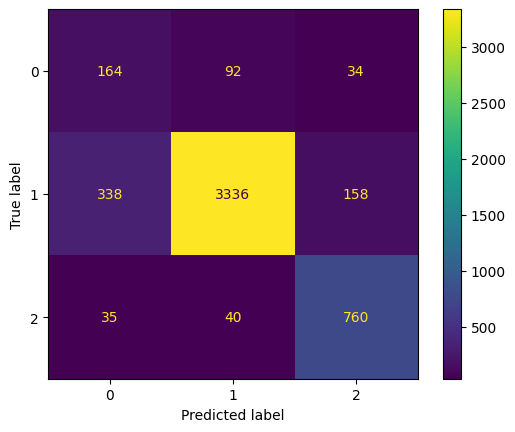

In [42]:
cm = confusion_matrix(y_test,pred_lg , labels=count_log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=count_log_reg.classes_)

disp.plot()
plt.show()

---
# <font color='#2E86C1'>**Counter Vectorization/Ada boost** </font>

---

In [43]:
dt = DecisionTreeClassifier(max_depth=1)

#AdaBoost 
ada = AdaBoostClassifier(random_state=42)

#Fit the model 
ada.fit(X_train_count,y_train)

#Predict class labels
y_pred_ada = ada.predict(X_test_count)

#Evaluation of the model
print(classification_report(y_test,y_pred_ada ))

              precision    recall  f1-score   support

           0       0.49      0.20      0.29       290
           1       0.94      0.95      0.94      3832
           2       0.81      0.94      0.87       835

    accuracy                           0.90      4957
   macro avg       0.75      0.70      0.70      4957
weighted avg       0.89      0.90      0.89      4957



In [44]:
print('Training Accuracy is : ',
      metrics.accuracy_score(y_train,
                             ada.predict(X_train_count ))*100)

Training Accuracy is :  90.69908201351761


---

# <font color='#2E86C1'>**Confusion matrix/Ada boost** </font>

---

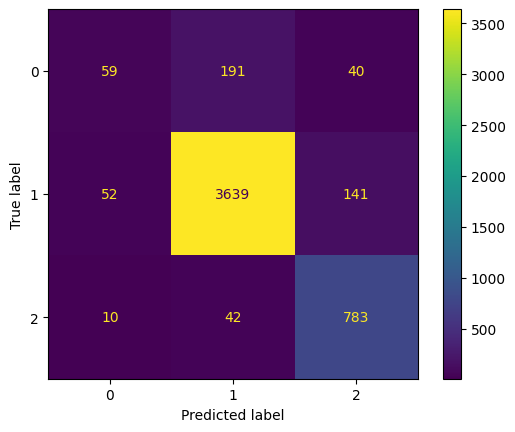

In [45]:
cm = confusion_matrix(y_test,y_pred_ada , labels=ada.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ada.classes_)

disp.plot()
plt.show()

---
# <font color='#2E86C1'>**Counter Vectorization/Random Forest** </font>

---

In [46]:
#RandomForest
rf=RandomForestClassifier(class_weight='balanced', n_jobs=1, random_state=42)

#Fit the model 
rf.fit(X_train_count,y_train)

#Predict class labels
y_pred_rf = rf.predict(X_test_count)

#Evaluation the model
print(classification_report(y_test,y_pred_rf ))

              precision    recall  f1-score   support

           0       0.42      0.31      0.36       290
           1       0.93      0.94      0.93      3832
           2       0.85      0.85      0.85       835

    accuracy                           0.89      4957
   macro avg       0.73      0.70      0.71      4957
weighted avg       0.88      0.89      0.89      4957



In [47]:
# Training Accuracy
print('Training Accuracy : ',
      metrics.accuracy_score(y_train,
                             rf.predict(X_train_count ))*100)

Training Accuracy :  99.7276303843438


---

# <font color='#2E86C1'>**Confusion matrix/Random Forest** </font>

---

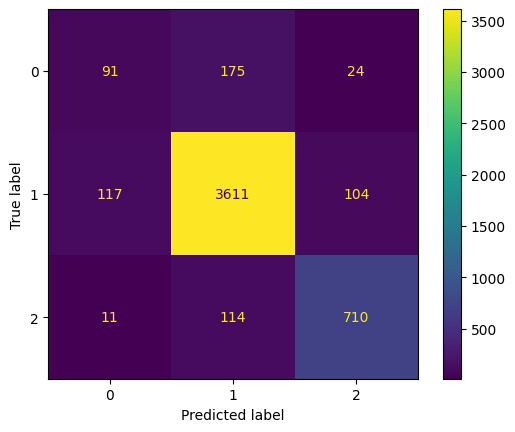

In [48]:
cm = confusion_matrix(y_test,y_pred_rf , labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)

disp.plot()
plt.show()

---
# <font color='#2E86C1'>**Counter Vectorization/KNN** </font>

---

In [49]:
# KNN
kn=KNeighborsClassifier()

# Fit the model 
kn.fit(X_train_count,y_train)

# Predict class labels
y_pred_kn = kn.predict(X_test_count)

# Evaulotion the model 
print(classification_report(y_test,y_pred_kn ))

              precision    recall  f1-score   support

           0       0.41      0.36      0.38       290
           1       0.88      0.94      0.91      3832
           2       0.78      0.57      0.66       835

    accuracy                           0.84      4957
   macro avg       0.69      0.62      0.65      4957
weighted avg       0.83      0.84      0.83      4957



In [50]:
print('Training Accuracy : ',
      metrics.accuracy_score(y_train,
                             kn.predict(X_train_count ))*100)

Training Accuracy :  88.69161706849592


---

# <font color='#2E86C1'>**Confusion matrix/KNN** </font>

---

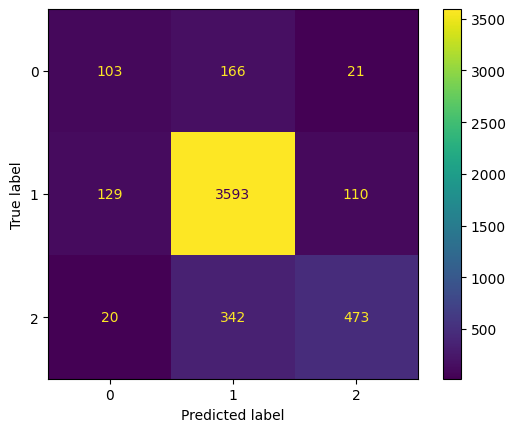

In [51]:
cm = confusion_matrix(y_test,y_pred_kn , labels=kn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=kn.classes_)

disp.plot()
plt.show()

---


# <font color='2E86C1'>**Grid search** </font>


---

Improving the final model such as adding features or balancing the data could improve the score of the model. Grid search is technique that finds the best  best hyperameters to tune the modesls that will give the best accurate scores. However  every model has the suggested hyperpramters during the training.

 Grid search for Logestic regression found the best hyperameters: C=0.1, penalty='l2',solver='saga' . The steps can be found in " Grid search for models.ipynb"



---



---


# <font color='#FF4500'>**Conclusion** </font>

---

As shown from the results below, Logestic regression has a better quite improved in terms of f1 score and recall. 



In [52]:
import io 
from google.colab import files
uploaded = files.upload()

Saving Count vectorizer-Davidson.xlsx to Count vectorizer-Davidson (2).xlsx


In [53]:
df= pd.read_excel(io.BytesIO(uploaded['Count vectorizer-Davidson.xlsx']))
df

,Model name,Precision,recall,f1-score,class
0,Logestic Regression - Counter v,0.30,0.57,0.40,0
1,Ada Boost - Counter v,0.49,0.20,0.29,0
2,Random Forest- Counter v,0.42,0.31,0.36,0
3,KNN - Counter v,0.41,0.36,0.38,0


---


# <font color='#8B0000'>**Using balanced technique on Count logestic regression** </font>

---

---


# <font color='#8B0000'>**Count logestic regression using Tomek links** </font>

---

In [54]:
#import Tomek links 
from imblearn.under_sampling import TomekLinks
tom = TomekLinks()

In [55]:
#Appply Tomek links on the trainning data
tomek_X_train, tomek_y_train = tom.fit_resample(X_train_count, y_train)

In [56]:
#Logestic regrresion
tomek_log_final = LogisticRegression(max_iter=200,class_weight='balanced',C=0.1, penalty='l2',solver='saga',random_state = 42)

In [57]:
#Fit the model
tomek_log_final.fit(tomek_X_train, tomek_y_train)

#Predict class labels
tomek_log_preds = tomek_log_final.predict(X_test_count)

#Evaluation of the model
print(classification_report(y_test, tomek_log_preds))

              precision    recall  f1-score   support

           0       0.30      0.64      0.41       290
           1       0.98      0.84      0.90      3832
           2       0.77      0.94      0.85       835

    accuracy                           0.85      4957
   macro avg       0.68      0.81      0.72      4957
weighted avg       0.90      0.85      0.87      4957



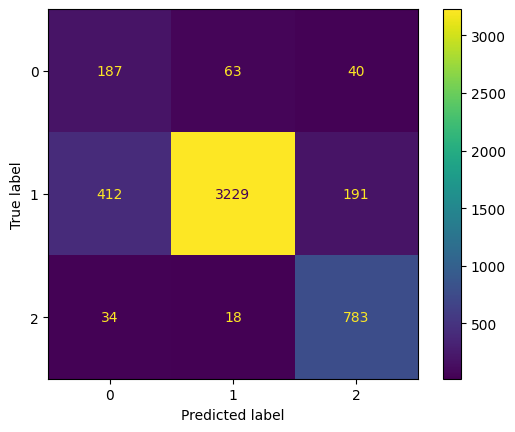

In [58]:
#Confusion matrix

cm = confusion_matrix(y_test, tomek_log_preds,labels=tomek_log_final.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tomek_log_final.classes_)

disp.plot()
plt.show()

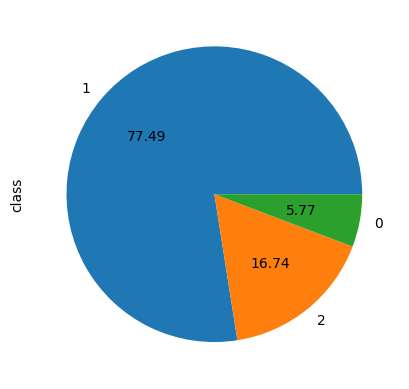

In [59]:
#Data distribution after Tomek links
ax = tomek_y_train.value_counts().plot.pie(autopct='%.2f')

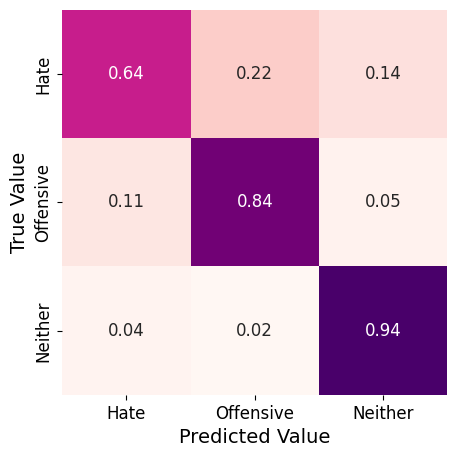

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,tomek_log_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusion_matrix[i,:]/float(confusion_matrix[i,:].sum())
names=['Hate','Offensive','Neither']
confusion_df = pd.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='RdPu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)

---


# <font color='#8B0000'>**Count logestic regression using SMOTE** </font>

---

In [61]:
# import SMOTE 
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state= 42)

In [62]:
#Appply SMOTE on the trainning data
smote_X_train, smote_y_train = smote.fit_resample(X_train_count, y_train)

In [63]:
# Logestic regression
lg_smote = LogisticRegression( max_iter=100,class_weight='balanced',C=0.1, penalty='l2',solver='saga')

In [64]:
#Fit the model
lg_smote.fit(smote_X_train,smote_y_train)

#Predict class labels
y_predict = lg_smote.predict(X_test_count)

# Evaluation of the model
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.32      0.48      0.38       290
           1       0.95      0.89      0.92      3832
           2       0.81      0.92      0.86       835

    accuracy                           0.87      4957
   macro avg       0.69      0.76      0.72      4957
weighted avg       0.89      0.87      0.88      4957



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


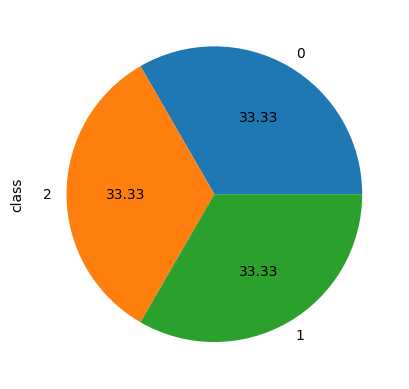

In [65]:
# Data distribution after SMOTE
ax = smote_y_train.value_counts().plot.pie(autopct='%.2f')

---


# <font color='#8B0000'>**Count logestic regression using RandomUnderSampler** </font>

---

In [66]:
# import RadnomUnderSampler
from imblearn.under_sampling import RandomUnderSampler

In [67]:
#Appply RandomUnerSampler on the trainning data
ros = RandomUnderSampler(random_state= 42)

# fit the model after ressample
X_res, y_res = ros.fit_resample (X_train_count, y_train)

In [68]:
# Logestic regression
clf = LogisticRegression(max_iter=100,class_weight='balanced', penalty='l2', solver='saga').fit(X_res, y_res)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [69]:
#Predict class labels
y_pred_o = clf.predict(X_test_count)

#Evaluation of the model
print(classification_report(y_test, y_pred_o))

              precision    recall  f1-score   support

           0       0.22      0.71      0.34       290
           1       0.97      0.78      0.87      3832
           2       0.78      0.90      0.84       835

    accuracy                           0.80      4957
   macro avg       0.66      0.80      0.68      4957
weighted avg       0.90      0.80      0.83      4957



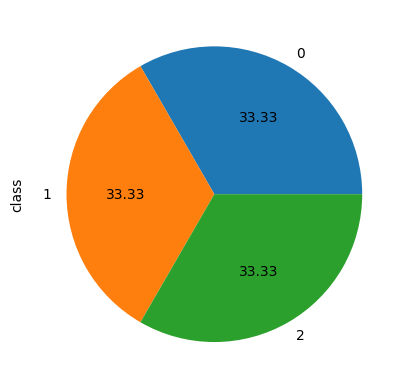

In [70]:
#Data distribution after RandomUnerSampler
ax = y_res.value_counts().plot.pie(autopct='%.2f')

---


# <font color='#FF4500'>**Conclusion** </font>

---

Tomek links had the best perfomance out over the other techniques

---


# <font color='#DAA520'>**Futher experiment with data spliting in Davidson dataset** </font>

---

**60% training & 40% testing**

---



In [71]:
#Data split to 60% training & 40% testing
X_train, X_test, y_train, y_test = train_test_split(df_x,df_y, random_state=42, test_size=0.4)

In [72]:
#Count vectorzier with stop words
count_vectorizer = CountVectorizer()
count = CountVectorizer(stop_words=stop_wordsall)

#Fit the count words to trainning 
X_train_count = count.fit_transform(X_train)

#Fit the count words to testing
X_test_count = count.transform(X_test)

In [73]:
#Appply Tomek links on the trainning data
tomek_X_train, tomek_y_train = tom.fit_resample(X_train_count, y_train)

In [74]:
#Logestic regression with Tomek links
tomek_log = LogisticRegression(max_iter=200,class_weight='balanced',C=0.1, penalty='l2',solver='saga',random_state = 42)

In [75]:
#Fit the model
tomek_log.fit(tomek_X_train, tomek_y_train)

#Predict class labels
tomek_log_preds = tomek_log.predict(X_test_count)

#Evaluation of the model
print(classification_report(y_test, tomek_log_preds))

              precision    recall  f1-score   support

           0       0.30      0.64      0.41       572
           1       0.98      0.85      0.91      7664
           2       0.77      0.95      0.85      1678

    accuracy                           0.85      9914
   macro avg       0.68      0.81      0.72      9914
weighted avg       0.90      0.85      0.87      9914



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


**70% training & 30% testing**

---

In [76]:
#Data split to 70% training & 30% testing
X_train, X_test, y_train, y_test = train_test_split(df_x,df_y, random_state=42, test_size=0.3)

In [77]:
#Count vectorzier with stop words
count_vectorizer = CountVectorizer()
count = CountVectorizer(stop_words=stop_wordsall)

#Fit the count words to trainning 
X_train_count = count.fit_transform(X_train)

#Fit the count words to testing
X_test_count = count.transform(X_test)

In [78]:
#Appply Tomek links on the trainning data
tomek_X_train, tomek_y_train = tom.fit_resample(X_train_count, y_train)

In [79]:
#Logestic regression with Tomek links
tomek_log = LogisticRegression(max_iter=200,class_weight='balanced',C=0.1, penalty='l2',solver='saga',random_state = 42)

In [80]:
#Fit the model
tomek_log.fit(tomek_X_train, tomek_y_train)

#Predict class labels
tomek_log_preds = tomek_log.predict(X_test_count)

#Evaluation of the model
print(classification_report(y_test, tomek_log_preds))

              precision    recall  f1-score   support

           0       0.29      0.64      0.40       427
           1       0.98      0.84      0.90      5747
           2       0.78      0.94      0.85      1261

    accuracy                           0.85      7435
   macro avg       0.68      0.81      0.72      7435
weighted avg       0.90      0.85      0.87      7435



---


# <font color='#FF4500'>**Conclusion** </font>

---

**Final model for Davidosn dataset is Logestic Regrression with counter vec using Tomek links**

---



In [84]:
import io 
from google.colab import files
uploaded = files.upload()

Saving Final-results-Davidson.xlsx to Final-results-Davidson (1).xlsx


Precision : 	0.30, 	recall:  0.64   , 	f1-score : 0.41
 	     

In [85]:
df= pd.read_excel(io.BytesIO(uploaded['Final-results-Davidson.xlsx']))
df

,Model name Precion,Precision,recall,f1-score
0,Logestic regression/Tomek links/Count,0.3,0.64,0.41


 
**References:**
 1. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.

 2. https://www.youtube.com/watch?v=RjhFcNZa1qo
 3. https://github.com/sidneykung/twitter_hate_speech_detection/blob/master/final_notebook.ipynb

4. https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.TomekLinks.html

5. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

6. https://www.youtube.com/watch?v=Bt5g7c2s38M&t=732s

7. https://github.com/sidneykung/twitter_hate_speech_detection/blob/master/final_notebook.ipynb

8. https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.TomekLinks.html
9. https://github.com/liannewriting/YouTube-videos-public/blob/main/imbalanced-data-machine-learning-abalone19/imbalanced_data_ml_abalone_final.ipynb

10. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

11. https://www.kaggle.com/code/redwankarimsony/nlp-101-tweet-sentiment-analysis-preprocessing/notebook

12. https://www.kaggle.com/code/redwankarimsony/nlp-101-tweet-sentiment-analysis-preprocessing/notebook

13. https://github.com/SimranKaur-23/Covid-19-Hate-Tweet-Analysis/blob/main/covid19_hateSpeech.ipynb
14. https://github.com/NakulLakhotia/Hate-Speech-Detection-in-Social-Media-using-Python/blob/master/final_customization.ipynb
15. https://www.geeksforgeeks.org/generating-word-cloud-python/ 

16. https://www.analyticsvidhya.com/blog/2021/08/creating-customized-word-cloud-in-python/ 